# Data 301 Final Exam

In [1]:
## Import commands 
# Please put all import commands here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

## Introduction

On Test 4 and Bonus Test 4, you worked on the `penguins` dataset.
For the **first part of the exam (32%)**, we will continue working with that dataset and do some more in-depth analysis.

For the **second part of the exam (60%)**, you will see a new dataset be expected to do some data loading, cleaning, processing, wrangling, and visualization. This part will be free-form and open-ended so you can demonstrate your skills. 

The **third part of the exam (8%)** is about whether you are able to follow instructions to commit and push your exam to the repository at various points of the exam (at minimum, you can of course commit and push more than the minimum).

The exam is roughly out of 100, I reserve the right to slightly adjust point values and make some questions bonus as needed.

## Part 1: More about Penguins (32%)

The penguins dataset needs no further introduction.
<img src="https://github.com/allisonhorst/palmerpenguins/blob/master/man/figures/lter_penguins.png?raw=true">

### Q1.1 - Load the penguins dataset (2 marks)

*Hint: You must use seaborn.load_dataset for full marks.*

In [2]:
# Your solution here
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Q1.2 - How much of the data is missing? (2 marks)

Your result should look something like this. The format does not matter, but this information needs to be present in your solution:

```
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
```

In [3]:
# Your solution here
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### Q1.3 - How to treat the missing values? (2 marks)

You notice that there are some missing values, how would you deal with the missing values in this context? In 2-3 sentences, justify and defend your choice. You do not need to provide any code for this section (but you can if you want to use results of code to justify your answer). 

*Hint: There is unlikely to be a wrong answer here, but whatever you choose, you must explain, justify and defend it.*

> In this dataset, it is not logical to fill the data with another value as we have four different continuous numerical data and one binary categorical data. Moreover, in our analysis we can avoid outliers values by dropping all NaN values. The most appropriate decision is to drop the rows with NaN values, and in this case, we will have more than 95% of our original dataset. 

Text(0.5, 1.0, 'Penguin Bill Length vs. Bill Depth by Species')

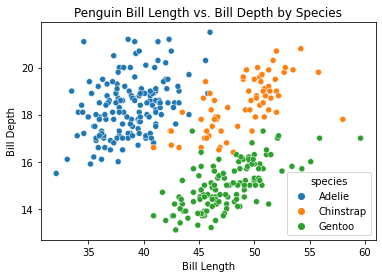

In [4]:
# Optional code to justify solution
ax = sns.scatterplot(data=df,x='bill_length_mm',y='bill_depth_mm', hue='species')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('Penguin Bill Length vs. Bill Depth by Species')



Text(0.5, 1.0, 'Penguin Bill Length vs. Bill Depth by Species')

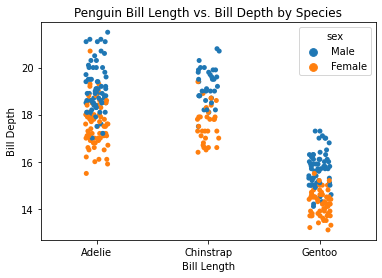

In [5]:
df_one_specie = df[df['species'] == 'Adelie']
ax = sns.stripplot(data=df,x='species',y='bill_depth_mm', hue='sex')
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('Penguin Bill Length vs. Bill Depth by Species')


### Q1.4 - Implement your chosen strategy of dealing with missing values (1 mark)

In [6]:
# Your solution here
df.dropna(inplace=True)
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Q1.5 - Write a loop to print out the unique values of each column with categorical data (2 marks):

Your sample output should look something like this:

```
species - Unique values: ['Adelie' 'Chinstrap' 'Gentoo']
island - Unique values: ['Torgersen' 'Biscoe' 'Dream']
sex - Unique values: ['Male' 'Female']
```

Note: depending on your choice for Q1.3 related 

In [7]:
# Your solution here
df_categorical = df.describe(exclude=[np.number]).T.index.tolist()
df_categorical

for key in df_categorical:
    print("{index} - Unique Values: {result}".format(index=key, result=df[key].unique()))

species - Unique Values: ['Adelie' 'Chinstrap' 'Gentoo']
island - Unique Values: ['Torgersen' 'Biscoe' 'Dream']
sex - Unique Values: ['Male' 'Female']


### Q3.1 - At this point you should use the Terminal to commit and push your changes to GitHub! (1 mark)

There is no need to write any code, we can use the github commit history to check this. Please do not use the web uploader or any apps (we can tell!)

### Q1.5 - Penguin awesomeness score (part 1) (5 marks)

Write a python function with the following requirements:

    - Takes in 3 parameters (all strings): "species", "island", "sex"
    - Returns an "awesomeness score", the total of the three values above
    - Scoring system: award the following points for each categorical column
        - Species
            - Gentoo penguins should get a score of 10
            - Chinstrap penguins should get a score of 8
            - Adélie penguins should get a score of 5
            - other/nan should get 5 (code it in, even if you don't have nans/other in your data

        - Island
            - Torgersen gets 10
            - Biscoe gets 4
            - Dream gets 1
            - other/nan should get 5 (code it in, even if you don't have nans/other in your data

        - Sex
            - Male should get 4
            - Female should get 6
            - other/nan should get 5 (code it in, even if you don't have nans/other in your data


In [8]:
def awesomeness_score_pt1(species, island, sex):
    score = 0
    
    if species == 'Gentoo':
        score += 10
    elif species == 'Chinstrap':
        score += 8
    elif species == 'Adelie':
        score += 5
    else: 
        score += 5
    
    if island == 'Torgersen':
        score += 10
    elif island == 'Biscoe':
        score += 4
    elif island == 'Dream':
        score += 1
    else:
        score += 5
    
    if sex == 'Male':
        score += 4
    elif sex == 'Female':
        score += 6
    else:
        score+= 5
    
    return score


In [9]:
assert (awesomeness_score_pt1('Gentoo', 'Torgersen', 'Male') == 24)
assert (awesomeness_score_pt1('Chinstrap', 'Biscoe', 'Female') == 18)
assert (awesomeness_score_pt1('Adelie', 'Dream', np.nan) == 11)
assert (awesomeness_score_pt1(np.nan, np.nan, np.nan) == 15)

### Q1.6 - Create a new column called `awesomness_1` (2 marks)

Use the pandas apply function to apply the function in Q1.5 to your dataframe row by row.
Each penguin should have a score called `awesomness_1`.

*Hint: If you cannot figure out how to use the apply function, use any other way to create a column called `awesomness_1` for partial credit.*

In [10]:
# Your solution here
df['awesomness_1'] = df.apply(lambda x: awesomeness_score_pt1(x['species'], x['island'], x['sex']), axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,awesomness_1
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,19
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,21
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,21
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,21
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,19
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,20
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,20
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,18
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,20


### Q1.7 - Calculate percentiles for the numeric columns (1 mark)

Compute the median values for each of the 4 numeric values.

Sample output:

```
median_bill_length_mm = 44.5
median_bill_depth_mm = 17.3
median_flipper_length_mm = 197.0
median_body_mass_g = 4050.0
```

In [11]:
# Your solution here
df_numerical = df.describe(include=['float64']).T.index.tolist()

for key in df_numerical:
    print("median_{index} = {result}".format(index=key, result=df[key].median()))


median_bill_length_mm = 44.5
median_bill_depth_mm = 17.3
median_flipper_length_mm = 197.0
median_body_mass_g = 4050.0


### Q3.2 - At this point you should use the Terminal to commit and push your changes to GitHub! (1 mark)

There is no need to write any code, we can use the github commit history to check this. Please do not use the web uploader or any apps (we can tell!)

### Q1.8 - Penguin awesomeness score (part 2) (5 marks)

Write ANOTHER python function with the following requirements:

    - Takes in 4 parameters:  "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g",
    - Returns an "awesomeness_score_pt2"
    - For **each** of the four numeric columns, award points based on the criteria:
        - bill_length_mm 
            - more than 10% above median_bill_length_mm: 10 points
            - within 10% of median_bill_length_mm: 5 points
            - below 10% of median_bill_length_mm: 0 points
            - nan values should get awarded 5 points

        - bill_depth_mm
            - more than 10% above median_bill_depth_mm: 10 points
            - within 10% of median_bill_depth_mm: 5 points
            - below 10% of median_bill_depth_mm: 0 points
            - nan values should get awarded 5 points

        - flipper_length_mm
            - more than 10% above median_flipper_length_mm: 10 points
            - within 10% of median_flipper_length_mm: 5 points
            - below 10% of median_flipper_length_mm: 0 points
            - nan values should median_flipper_length_mm awarded 5 points

        - body_mass_g
            - more than 10% above median_body_mass_g: 10 points
            - within 10% of median_body_mass_g: 5 points
            - below 10% of median_body_mass_g: 0 points
            - nan values should median_body_mass_g awarded 5 points
- median_bill_length_mm = 44.5
- median_bill_depth_mm = 17.3
- median_flipper_length_mm = 197.0
- median_body_mass_g = 4050.0


In [12]:
# Your solution here

def awesomeness_score_pt2(bill_length, bill_depth, flipper_length, body_mass):
    median_index = df.describe(include=['float64']).T.index.tolist()
    parameter = {'bill_length_mm' : bill_length, 
                 'bill_depth_mm' : bill_depth, 
                 'flipper_length_mm' : flipper_length, 
                 'body_mass_g' : body_mass}
    score = 0
    for key in median_index:
        median = df[key].mean()
        if parameter[key] > (median * 1.10):
            score += 10
        elif parameter[key] < (median * 0.9):
            pass
        else:
            score += 5        
        
    return score

In [13]:
assert (awesomeness_score_pt2(1, 1, 1, 1) == 0)
assert (awesomeness_score_pt2(44.5, 17.3, 197.0, 4050.0) == 20)
assert (awesomeness_score_pt2(np.nan, np.nan, np.nan, np.nan) == 20)
assert (awesomeness_score_pt2(100.0, 100.0, 1000.0, 10000.0) == 40)


### Q1.9 - Create a new column called `awesomness_2` (2 marks)

Use the pandas apply function to apply the function in Q1.8 to your dataframe row by row.
Each penguin should have a score called `awesomness_2`.

*Hint: If you cannot figure out how to use the apply function, use any other way to create a column called `awesomness_2` for partial credit.*

In [14]:
# Your solution here
df['awesomness_2'] = df.apply(lambda x: awesomeness_score_pt2(x['bill_length_mm'], x['bill_depth_mm'], x['flipper_length_mm'], x['body_mass_g']), axis=1)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,awesomness_1,awesomness_2
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,19,10
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,21,15
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,21,15
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,21,15
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,19,15
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,20,20
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,20,20
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,18,35
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,20,20


### Q1.10 - Add awesomeness_1 and awesomeness_2 as a new column (1 mark)

Create a new column in your dataframe called "Awesomeness_score" and compute it by adding awesomeness_1 and awesomeness_2 together.

*Hint: If you were not able to calculate or add awesomeness_1 and awesomeness_2 you can still get this mark by showing us you know how you WOULD add the two columns together.*

In [15]:
# Your solution here
df['Awesomeness_score'] = df['awesomness_1'] + df['awesomness_2']
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,awesomness_1,awesomness_2,Awesomeness_score
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,19,10,29
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,21,15,36
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,21,15,36
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,21,15,36
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,19,15,34
...,...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,20,20,40
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,20,20,40
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,18,35,53
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,20,20,40


### Q3.3 - At this point you should use the Terminal to commit and push your changes to GitHub! (1 mark)

There is no need to write any code, we can use the github commit history to check this. Please do not use the web uploader or any apps (we can tell!)

### Q1.11 - Create ONE violin plot (using seaborn) to show the awesomeness score of each of the three penguin species. (3 marks)

*Hint: If you could not calculate the awesomness score, you can still get marks for this question by showing us you know how to create violin plots using seaborn. Instead of awesomeness score, you can answer how the `body_mass_g` is distributed by the species.*

<Figure size 3600x3600 with 0 Axes>

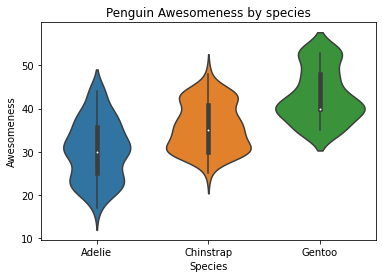

<Figure size 3600x3600 with 0 Axes>

In [16]:
# Your solution here
ax = sns.violinplot(data=df, x='species', y='Awesomeness_score')
plt.title('Penguin Awesomeness by species')
plt.ylabel('Awesomeness')
plt.xlabel('Species')
plt.figure(figsize=(50,50))

### Q1.12 - Comment on the plot above - what are some observations from the data and the plot? (2 marks)

Note: I am **not** asking you to make statistically relevant observations here; you should be able to describe what is happening in the plot above using words.

*Hint: You do not need more than 2-3 sentences here.*

> We can claim that there is a clear ranking of awesomeness among different species. Adelie specie is the less awesome penguin with the highest deviation between species. The Gentoo specie is the most awesome. At last and Chinstrap awesomeness is clearly in between but not more or less awsome than Adelie and Gentoo species.

### Q1.13 - Critique the analysis that we did above. Can you think of any problems with the awesomeness score? (2 marks)

**Note:** If you do see problems, suggest ways we could address them. If you do not see problems, justify or defend the awesomeness score. 

 > From my perspective, it is not logical to provide a ranking by mixing numerical and categorical data. There should be an awesomeness ranking based on numerical that is based on measurements. On the other hand, there should be categorical awesomeness ranking on species, location, and sex. 

### Q3.4 - At this point you should use the Terminal to commit and push your changes to GitHub! (1 mark)

There is no need to write any code, we can use the github commit history to check this. Please do not use the web uploader or any apps (we can tell!)

## Part 2: Open-ended analysis (60%)

### Introduction

In this repository, there is a file called `StudentsPerformance.csv`. Here is the description of the data:

- There are 1000 students that attended a paid workshop to improve their standardized test results.
- Each student has some demographic information, as well as some test scores. 
- Here is the description of each column:
    - gender: male or female.
    - race/ethnicity: anonymized to remove the information, but grouped into categories.
    - parental level of education: the highest level of education parents of the student completed (highest is chosen of both parents).
    - lunch: This is a column that is a surrogate for socioeconomic status. "standard" means these students paid their way, "free/reduced" means that the students requested a subsidy/bursary to cover costs.
    - test preparation course: students that completed a test-preparation score get "completed" and those that didn't get "none".
    - math score: score on the math standardized test (out of 100).
    - reading score: score on the reading standardized test (out of 100).
    - writing score: score on the writing standardized test (out of 100). 

### Q2.1 - Load the data (2 marks)

In [17]:
# Your solution here
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Q2.2 - Clean the data (3 marks)

This step is needed so you can visualize your data easier.

Replace the "Parental level of Education" column as follows:

- "some high school" to: "1-some high school"
- "high school" to: "2-high school"
- "some college" to: "3-some college"
- "associate's degree" to: "4-associate's degree"
- "bachelor's degree" to: "5-bachelor's degree"
- "master's degree" to: "6-master's degree"


In [18]:
# Your solution here
def replace_parental_education(education):
    replace = {"some high school" : "1-some high school",
               "high school" : "2-high school",
               "some college" : "3-some college",
               "associate's degree" : "4-associate's degree",
               "bachelor's degree" : "5-bachelor's degree",
               "master's degree" : "6-master's degree"}
    if education in replace:
        return replace[education]
    return education

df['parental level of education'] = df.apply(lambda x:replace_parental_education(x['parental level of education']), axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,5-bachelor's degree,standard,none,72,72,74
1,female,group C,3-some college,standard,completed,69,90,88
2,female,group B,6-master's degree,standard,none,90,95,93
3,male,group A,4-associate's degree,free/reduced,none,47,57,44
4,male,group C,3-some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,6-master's degree,standard,completed,88,99,95
996,male,group C,2-high school,free/reduced,none,62,55,55
997,female,group C,2-high school,free/reduced,completed,59,71,65
998,female,group D,3-some college,standard,completed,68,78,77


### Q2.3 - Exploratory Data Analysis (15 marks)

Do an EDA to understand your dataset. No additional guidelines/requirements are given (you should know what a good EDA includes by now!)

In [19]:
# Your solution here (feel free to add more cells as needed).
df.describe(include='all').T.drop('count', axis=1)

,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,6,3-some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,NaN,NaN,NaN,66.089,15.1631,0,57,66,77,100
reading score,NaN,NaN,NaN,69.169,14.6002,17,59,70,79,100
writing score,NaN,NaN,NaN,68.054,15.1957,10,57.75,69,79,100


In [20]:
profile = pandas_profiling.ProfileReport(df, title="Student Perfomance Profiling Report", explorative=True)
profile

### Q3.5 - At this point you should use the Terminal to commit and push your changes to GitHub! (1 mark)

There is no need to write any code, we can use the github commit history to check this. Please do not use the web uploader or any apps (we can tell!)

## Answering Research questions (and creating your own)

Below are 2 research questions I have given you, and 2 research questions that you need to come up with (and answer).

For each research question below:
    - please answer it using ONLY this dataset (i.e. please do not find other datasets and merge them with this).
    - create at least one visualization to answer your research question.
    - write a few sentences (no more than 5) explaining how the plot answers your research question.

You will be graded on how well your analysis and visualizations answer the research questions. The point value for each question is in brackets.

Be creative and be free! 

Good luck!

### Q2.4: How does the parental level of education correspond to the students' average math, writing, and reading scores? (10 marks)

In [21]:
# Your solution here (feel free to add more cells as needed).
def getAverage(row):
    sum = row['math score'] + row['writing score'] + row['reading score']
    return float(sum/3)

df['average score'] = df.apply(lambda x: getAverage(x), axis=1)
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,5-bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,3-some college,standard,completed,69,90,88,82.333333


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1-some high school'),
  Text(1, 0, '2-high school'),
  Text(2, 0, '3-some college'),
  Text(3, 0, "4-associate's degree"),
  Text(4, 0, "5-bachelor's degree"),
  Text(5, 0, "6-master's degree")])

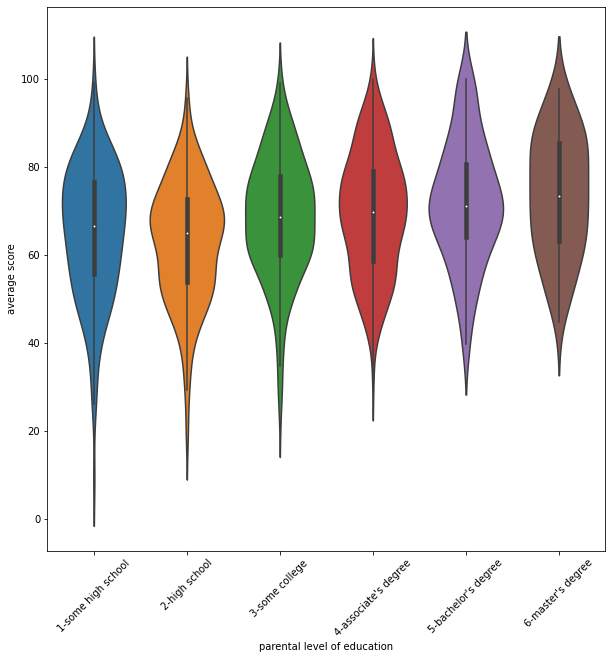

In [22]:
plt.figure(figsize=(10.0,10.0))
parental_order = ["1-some high school", "2-high school", "3-some college", "4-associate's degree", "5-bachelor's degree", "6-master's degree"]
ax =sns.violinplot(data=df, x="parental level of education", y="average score", order=parental_order)
plt.xticks(rotation=45)

Response:
>By adding an extra column to the data frame and calculating the average between math, writing, and reading scores of each student, it was easier to plot a graph to see the effect of parental level of education and average score. Based on the graph, we can conclude that after some high school, the range of average score gets tighter and the median increases. As well, the lowest point of average score increases as the parents have more education. A relevant point is in when the parents have somehigh school, because their kids behavior is really inconsistent and we cannot make a generalization.

### Q2.5: How do the average scores vary by gender (assigned at birth) (10 marks)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

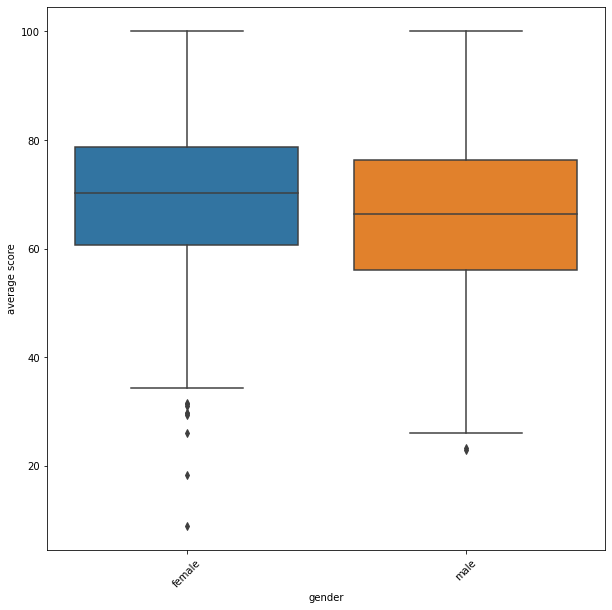

In [23]:
# Your solution here (feel free to add more cells as needed).
plt.figure(figsize=(10.0,10.0))
ax =sns.boxplot(data=df, x="gender", y="average score")
plt.xticks(rotation=45)

Response:
>We can conclude some aspects by plotting a box plot to display the average score distribution by gender. We can observe that female students generally perform better on average scores than male students. The female interquartile range is above male, but there are some special cases. Female students have more outliers than man, and these outliers go lower than any other male student.

### Q3.6 - At this point you should use the Terminal to commit and push your changes to GitHub! (1 mark)

There is no need to write any code, we can use the github commit history to check this. Please do not use the web uploader or any apps (we can tell!)

### Q2.5: Create your own research question 1 and answer it (12 marks)

## Does the preparation course support students' average score by subject?

In [24]:
idvars = df.columns.tolist()
idvars.remove('reading score')
idvars.remove('writing score')
idvars.remove('math score')
idvars

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'average score']

In [25]:
melted = df.melt(id_vars=idvars,
                value_vars=['math score', 'reading score', 'writing score'],
                var_name = 'subject',
                value_name='score')
melted

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average score,subject,score
0,female,group B,5-bachelor's degree,standard,none,72.666667,math score,72
1,female,group C,3-some college,standard,completed,82.333333,math score,69
2,female,group B,6-master's degree,standard,none,92.666667,math score,90
3,male,group A,4-associate's degree,free/reduced,none,49.333333,math score,47
4,male,group C,3-some college,standard,none,76.333333,math score,76
...,...,...,...,...,...,...,...,...
2995,female,group E,6-master's degree,standard,completed,94.000000,writing score,95
2996,male,group C,2-high school,free/reduced,none,57.333333,writing score,55
2997,female,group C,2-high school,free/reduced,completed,65.000000,writing score,65
2998,female,group D,3-some college,standard,completed,74.333333,writing score,77


(array([0, 1, 2]),
 [Text(0, 0, 'math score'),
  Text(1, 0, 'reading score'),
  Text(2, 0, 'writing score')])

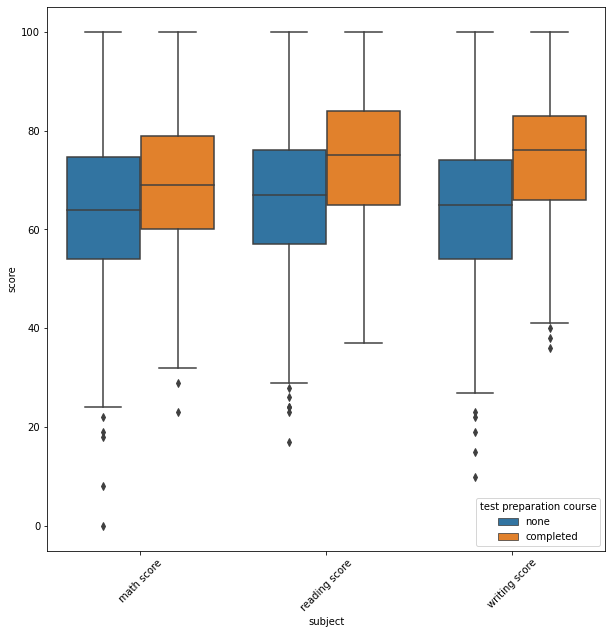

In [26]:
plt.figure(figsize=(10.0,10.0))
ax =sns.boxplot(data=melted, x="subject", y="score", hue="test preparation course")
plt.xticks(rotation=45)

Response:
> Based on the visual representation of question 1, we can affirm the test preparation course's support more depending on the subject. By analyzing the difference between the interquartile range we can see three different results. For the math score, if a student completes the preparation course the median will be below the third quartile, there is just a small difference of improvement. Moreover, the median for the reading score by completing the preparation course is closer but not above the third quartile. At last, the writing score presents a significant change if the student completes the test preparation course; the median if the student completes the preparation course is above the third quartile when is not completed.

### Q3.7 - At this point you should use the Terminal to commit and push your changes to GitHub! (1 mark)

There is no need to write any code, we can use the github commit history to check this. Please do not use the web uploader or any apps (we can tell!)

### Q2.6: Create your own research question 2 and answer it (12 marks)

## Does nutrition approach has an effect on average grades?

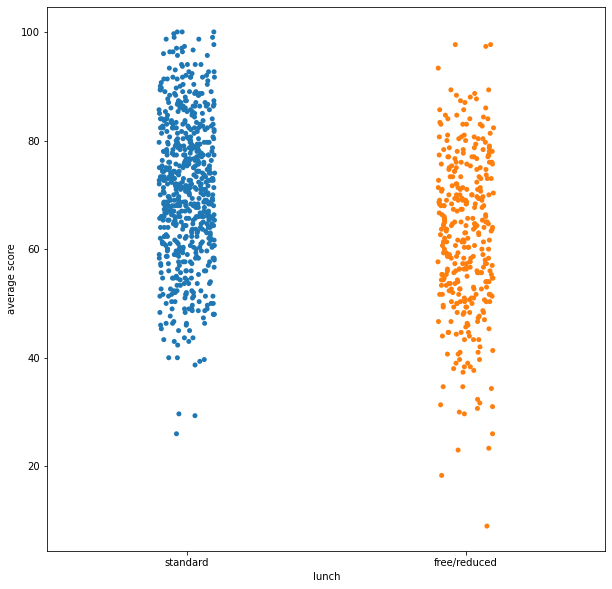

In [27]:
# Your solution here (feel free to add more cells as needed).
plt.figure(figsize=(10.0,10.0))
ax = sns.stripplot(data=df, x="lunch", y="average score")

Response:
> Based on the distribution of grades depending on the lunch, we can conclude that nutrition is essential for the brain. With the standard lunch, students will get a more nutritious meal than the free/reduced. By analyzing the graph, we can agree that nutrients are related to performance. Hence, students with the standard meal will get a higher average score.

### Q3.8 - At this point you should use the Terminal to commit and push your changes to GitHub! (1 mark)

There is no need to write any code, we can use the github commit history to check this. Please do not use the web uploader or any apps (we can tell!)

That's it! Have a wonderful break - thanks for a great course!

Please let me know using the anonymous feedback form what you thought of the exam: https://firas.moosvi.com/courses/data301/about/feedback.html. It's the first time I've done an exam like this!